# Bathing Water Quality Analysis

## Projekt: Analyse der Badegewässerqualität in Europa

**Analysis of Bathing Water Status Across Europe**

###  Zeitraum / Time Range: 1990–2024

###  Datenpunkte / Dataset: 672,629 records

**Datenfelder / Fields:**

- countryCode → International country code.
- bathingWaterIdentifier → Unique identifier of the bathing water.  
- groupIdentifier → Unique identifier of the group of bathing waters.
- bathingWaterName → Name of bathing water in local language.
- bathingWaterType → 'coastalBathingWater', 'transitionalBathingWater', 'lakeBathingWater' or 'riverBathingWater'.
- geographicalConstraint → Geographical constraints in accordance with Annex IV of BWD.
- lon / lat → International geographical longitude / latitude coordinate in decimal degrees format.
- bwProfile → Hyperlink to documents or web pages with bathing water profiles.
- season → The year corresponding to the bathing water season to which assessment statuses are related.
- quality → Quality status (1990 - 2024): 0 - Not classified, 1 - Excellent, 2 - Good, 3 - Sufficient, 4 - Poor.
- monitoringCalendar → Monitoring calendar status (2018 - 2024): 0 - Not implemented, 1 - Implemented.
- management → Management status: 1 - Continuously monitored, 2 - Newly identified, 3 - Quality changes, 4 - Monitoring gap.

## Ziel / Objective

- Entwicklung der Wasserqualität über Zeit analysieren
- Vergleich zwischen Ländern und Regionen
- Identifikation von Trends und Problemzonen
- Geodaten-Analyse der Badestellen

### --------------------------------------------
### Datenüberblick / Data Overview
### --------------------------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from IPython.display import display, HTML

pd.set_option('display.max_rows', None)  # Show all rows
 
pd.set_option('display.max_colwidth', None)  # Don't truncate column content
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line-wrapping 

display(HTML("<style>.dataframe td { white-space: nowrap; }</style>"))  # This forces each cell to stay on one line

In [ ]:
# Load the dataset

file = "bathing_water_quality_dataset.csv"
df = pd.read_csv(file, low_memory=False)
df.info()
df.describe(include='all')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672629 entries, 0 to 672628
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   countryCode             672629 non-null  object 
 1   bathingWaterIdentifier  672629 non-null  object 
 2   groupIdentifier         12055 non-null   object 
 3   bathingWaterName        672629 non-null  object 
 4   bathingWaterType        672629 non-null  object 
 5   geographicalConstraint  672629 non-null  object 
 6   lon                     658445 non-null  float64
 7   lat                     658445 non-null  float64
 8   bwProfile               350543 non-null  object 
 9   season                  672629 non-null  int64  
 10  quality                 672629 non-null  object 
 11  monitoringCalendar      154742 non-null  object 
 12  management              156916 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 66.7+ MB


,countryCode,bathingWaterIdentifier,groupIdentifier,bathingWaterName,bathingWaterType,geographicalConstraint,lon,lat,bwProfile,season,quality,monitoringCalendar,management
0,AL,AL101,NaN,VELIPOJA,coastalBathingWater,FALSE,19.4100,41.8590,http://akm.gov.al/bregdete.html,2024,2 - Good,0 - Not implemented,1 - Continuously monitored
1,AL,AL102,NaN,VELIPOJA,coastalBathingWater,FALSE,19.4131,41.8615,http://akm.gov.al/bregdete.html,2024,2 - Good,0 - Not implemented,1 - Continuously monitored
2,AL,AL103,NaN,VELIPOJA,coastalBathingWater,FALSE,19.4159,41.8623,http://akm.gov.al/bregdete.html,2024,2 - Good,0 - Not implemented,1 - Continuously monitored
3,AL,AL104,NaN,VELIPOJA,coastalBathingWater,FALSE,19.4240,41.8617,http://akm.gov.al/bregdete.html,2024,3 - Sufficient,0 - Not implemented,1 - Continuously monitored
4,AL,AL105,NaN,VELIPOJA,coastalBathingWater,FALSE,19.4274,41.8611,http://akm.gov.al/bregdete.html,2024,2 - Good,0 - Not implemented,1 - Continuously monitored


### --------------------------------------------
### Fehlende Werte / Missing Values
### --------------------------------------------

In [4]:
missing = df.isnull().sum().sort_values(ascending=False)
print(missing)

groupIdentifier           660574
monitoringCalendar        517887
management                515713
bwProfile                 322086
lon                        14184
lat                        14184
bathingWaterName               0
bathingWaterIdentifier         0
countryCode                    0
bathingWaterType               0
geographicalConstraint         0
quality                        0
season                         0
dtype: int64


### --------------------------------------------
### Gruppierungen / Grouping Examples
### --------------------------------------------

In [24]:
# 1. Anzahl Badestellen pro Land / Bathing Sites per Country

df['countryCode'].value_counts().head(11)

countryCode
IT    184318
FR    106023
DE     68004
ES     67275
EL     59963
DK     38450
NL     21043
UK     17339
SE     17237
PT     16265
HR     15053
Name: count, dtype: int64

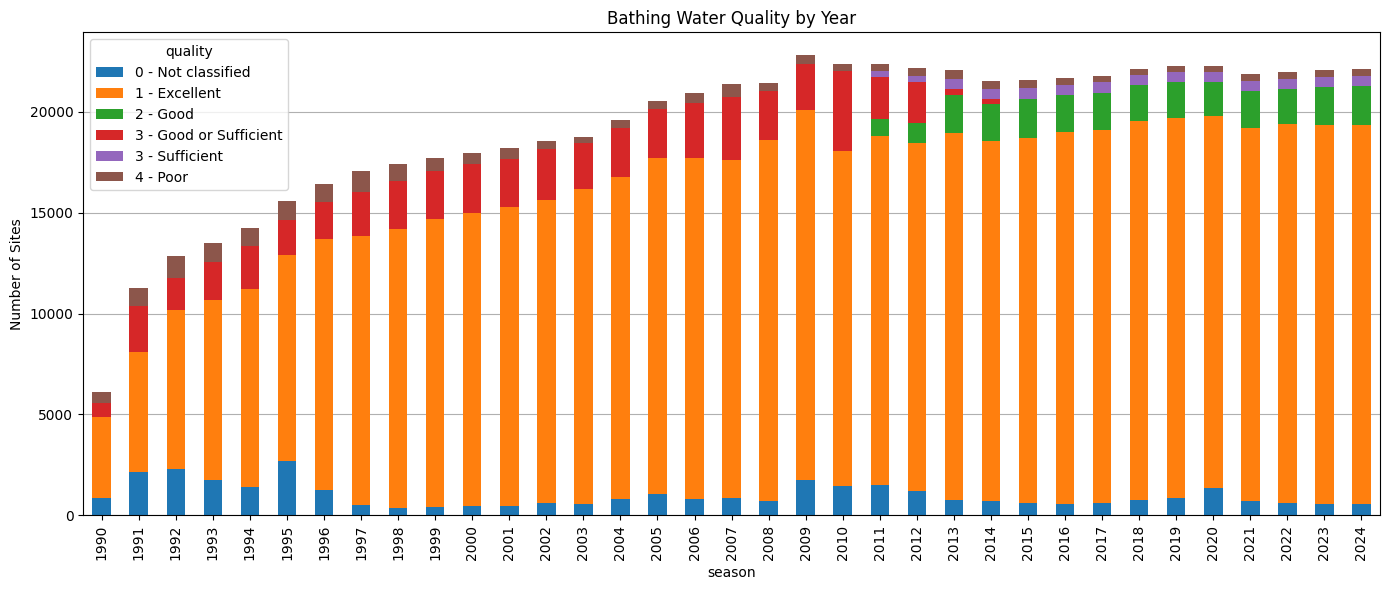

In [20]:
# 2. Qualität der Gewässer über die Jahre / Quality Over Time

quality_by_year = df.groupby(['season', 'quality']).size().unstack().fillna(0)
quality_by_year.plot(kind='bar', stacked=True, figsize=(14,6), zorder=2)
plt.title("Bathing Water Quality by Year")
plt.ylabel("Number of Sites")
plt.grid(True, axis='y', which='major', zorder=1)
plt.tight_layout()
plt.show()

In [19]:
# 3. Durchschnittliche Breiten-/Längengrade pro Land / Average latitude/longitude per country

df.groupby("countryCode")[["lat", "lon"]].mean().sort_values("lat")

,lat,lon
countryCode,,
CY,34.869462,33.277808
MT,35.951625,14.400901
EL,38.021735,23.728701
PT,38.625353,-11.418916
ES,39.188061,-4.078077
AL,40.882341,19.622794
IT,41.335465,13.058054
ME,42.267767,18.864477
BG,42.808069,27.822304


### --------------------------------------------
### Geodaten / Geospatial Distribution
### --------------------------------------------

In [9]:
! pip install folium

In [29]:
import folium
from folium.plugins import FloatImage

# Define a color map for quality levels

quality_colors = {
    '1 - Excellent': 'blue',
    '2 - Good': 'green',
    '3 - Sufficient': 'orange',
    '4 - Poor': 'red'
}

# Drop rows with missing coordinates and quality

geo_df = df.dropna(subset=["lat", "lon", "quality"])

# Create map

m = folium.Map(location=[50, 10], zoom_start=4)

# Add markers with appropriate color

for _, row in geo_df.sample(1000, random_state=42).iterrows():
    quality = row['quality']
    color = quality_colors.get(quality, 'gray')  # Default to gray if unknown
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        popup=f"{row['bathingWaterName']} ({quality})",
        color=color,
        fill=True,
        fill_opacity=0.7,
        weight=1
    ).add_to(m)

# Create HTML legend manually

legend_html = '''
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 180px; height: 120px; 
    background-color: white;
    border:2px solid grey; z-index:9999; font-size:14px;
    padding: 10px;
">
<b>Bathing Water Quality</b><br>
<i style="color:blue;">●</i> 1 - Excellent<br>
<i style="color:green;">●</i> 2 - Good<br>
<i style="color:orange;">●</i> 3 - Sufficient<br>
<i style="color:red;">●</i> 4 - Poor<br>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map

m.save("bathing_water_quality_map.html")

### --------------------------------------------
### Qualitätsverteilung pro Land / Quality Share per Country
### --------------------------------------------

In [16]:
quality_country = df.groupby(['countryCode', 'quality']).size().unstack().fillna(0)
quality_country_percent = quality_country.div(quality_country.sum(axis=1), axis=0) * 100
quality_country_percent.sort_values("1 - Excellent", ascending=False).head(10)

quality,0 - Not classified,1 - Excellent,2 - Good,3 - Good or Sufficient,3 - Sufficient,4 - Poor
countryCode,,,,,,
CY,1.236674,98.081023,0.042644,0.341151,0.000000,0.298507
HR,1.853451,95.515844,1.773733,0.325517,0.451737,0.079718
EL,3.562197,93.332555,0.867201,1.652686,0.120074,0.465287
MT,2.643678,92.183908,1.436782,2.183908,0.747126,0.804598
IT,4.227476,86.906867,2.001432,3.657809,0.743281,2.463134
AT,0.203804,84.198370,1.739130,12.010870,0.285326,1.562500
ES,1.324415,83.412858,3.768116,7.824601,1.184690,2.485321
PT,3.000307,82.662158,4.027052,6.596987,0.854596,2.858899
DK,1.955787,82.546164,3.518856,8.239272,1.058518,2.681404


### --------------------------------------------
### Zeitreihenanalyse / Time Series Analysis
### --------------------------------------------

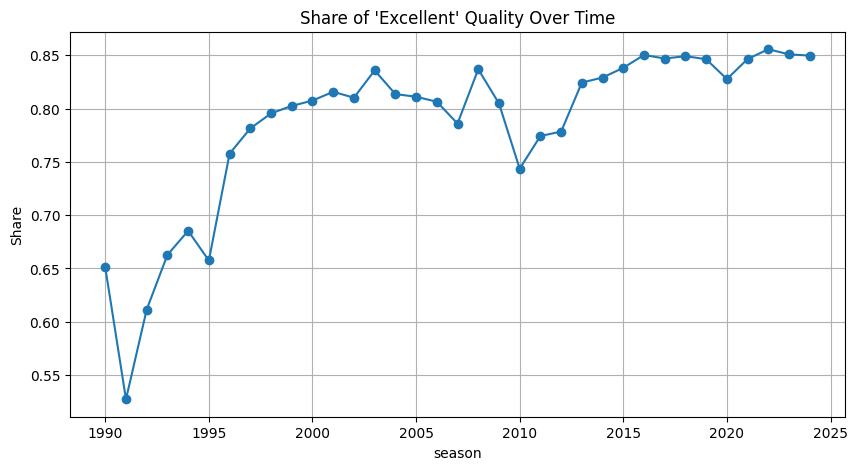

In [18]:
# Anteil "Excellent" Qualität über Zeit / Share of "Excellent" quality over time

excellent_share = df[df['quality'] == '1 - Excellent'].groupby('season').size() / df.groupby('season').size()
excellent_share.plot(marker='o', figsize=(10,5))
plt.title("Share of 'Excellent' Quality Over Time")
plt.ylabel("Share")
plt.grid(True)
plt.show()

### --------------------------------------------
### Top Badestellen / Best & Worst Sites
### --------------------------------------------

In [41]:
# Filter for "Excellent" quality 

excellent_df = df[df['quality'] == '1 - Excellent']

# Group by both bathingWaterName and countryCode

best_sites = (
    excellent_df
    .groupby(['bathingWaterName', 'countryCode'])
    .size()
    .sort_values(ascending=False)
)

# Display top 20

best_sites.head(20)

bathingWaterName  countryCode
PLAGE SUD         FR             222
AGIOS GEORGIOS    EL             213
PLATYS GIALOS     EL             211
STAZ. FF.SS.      IT             210
GRANDE PLAGE      FR             207
AGIOS NIKOLAOS    EL             188
AGIA MARINA       EL             187
PLAYA GRAN PM1    ES             185
PALAU             IT             183
LA GRANDE PLAGE   FR             182
STAZIONE FF.SS.   IT             182
SANT'ANTIOCO      IT             178
LA PLAGE          FR             178
ARZACHENA         IT             166
LA MADDALENA      IT             165
PLAN D'EAU        FR             164
AGIA PARASKEVI    EL             155
KALAMITSI         EL             155
ADEJE             ES             155
PLAGE NORD        FR             149
dtype: int64

In [42]:
# Filter for "Poor" quality

poor_df = df[df['quality'] == '4 - Poor']

# Group by both bathingWaterName and countryCode

worst_sites = (
    poor_df
    .groupby(['bathingWaterName', 'countryCode'])
    .size()
    .sort_values(ascending=False)
)

# Display top 20

worst_sites.head(20)

bathingWaterName                countryCode
DURRES                          AL             54
VLORE                           AL             31
SOUTH LAKELAND                  UK             27
KAVAJE                          AL             26
NORD FOCE SARNO                 IT             26
EX CARTIERA                     IT             23
RIO PISUERGA VALLADOLID PM1     ES             22
CIRCOLO NAUTICO                 IT             22
NORD FOCE MUSONE                IT             22
REGGIO DI CALABRIA              IT             22
STABILIMENTO BALNEARE           IT             21
SUD FIUME GARIGLIANO            IT             21
AMEGLIA                         IT             21
GALLICO - LIMONETO              IT             21
VILLA COMUNALE                  IT             21
INSTOW                          UK             21
PLAYA DE TOÑA PM1               ES             20
100 MT A NORD FOCE F. FELTRINO  IT             20
500 M N TOTT. ANNUNZIATA        IT             20
PLAGE 